## Import all the necessary packages

In [1]:
import pandas as pd
import numpy as np
from numpy import dot
from numpy.linalg import norm
import matplotlib.pyplot as plt

## Load the data into a dataframe

In [2]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
df = pd.read_csv(datadir + 'test_rgb.csv')

In [3]:
df.shape

(10000, 3074)

In [4]:
df.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


## Select 1 of the 10 classes from the CIFAR-10 dataset

In [5]:
input_item = input("Enter one of these items : {}".format(df['Class Name'].unique()))

Enter one of these items : ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird']truck


In [6]:
input_num = input("Enter a number between 1 and 1000 : ")

Enter a number between 1 and 1000 : 2


## Select an autoencoding method

In [7]:
encoding_method = input("Choose one of these autoencoding methods: \n 1) Deep Autoencoder \n 2) Noisy Autoencoder \n 3) Convolutional Autoencoder \n") 

Choose one of these autoencoding methods: 
 1) Deep Autoencoder 
 2) Noisy Autoencoder 
 3) Convolutional Autoencoder 
3


## Select a combination of the Activation Layer-Optimizer-Loss Function

In [8]:
combination = input("Choose one of these combinations: \n 1) ReLU-Sigmoid-Adam-MSE \n 2) ReLU-Tanh-Adam-MSE \n 3) ReLU-Sigmoid-AdaDelta-MSE \n 4) ReLU-Tanh-AdaDelta-MSE \n 5) ReLU-Sigmoid-Adam-Binary Cross Entropy \n 6) ReLU-Tanh-Adam-Binary Cross Entropy \n 7) ReLU-Sigmoid-AdaDelta-Binary Cross Entropy \n 8) ReLU-Tanh-AdaDelta-Binary Cross Entropy \n")

Choose one of these combinations: 
 1) ReLU-Sigmoid-Adam-MSE 
 2) ReLU-Tanh-Adam-MSE 
 3) ReLU-Sigmoid-AdaDelta-MSE 
 4) ReLU-Tanh-AdaDelta-MSE 
 5) ReLU-Sigmoid-Adam-Binary Cross Entropy 
 6) ReLU-Tanh-Adam-Binary Cross Entropy 
 7) ReLU-Sigmoid-AdaDelta-Binary Cross Entropy 
 8) ReLU-Tanh-AdaDelta-Binary Cross Entropy 
3


## Select a similarity metric

In [9]:
similarity_metric = input("Enter a similarity metric: \n 1) Cosine Similarity \n 2) Euclidean Distance \n")

Enter a similarity metric: 
 1) Cosine Similarity 
 2) Euclidean Distance 
1


## Displaying images in proximity to the queried image

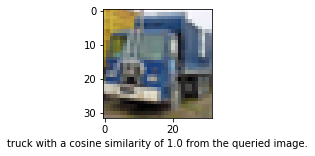

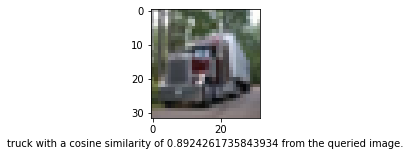

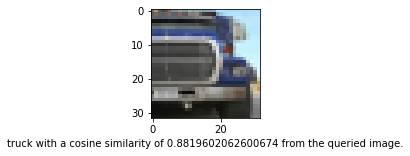

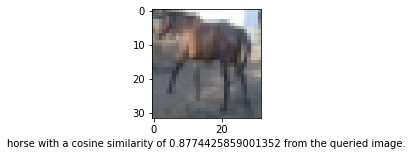

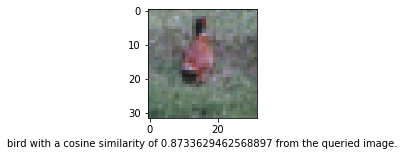

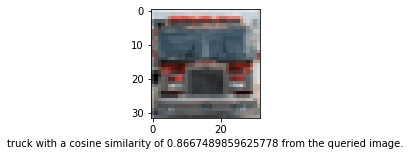

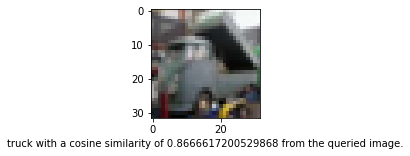

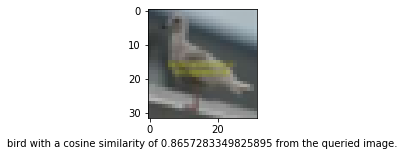

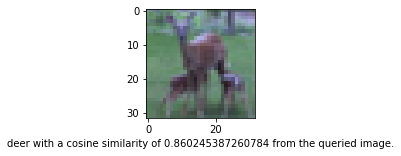

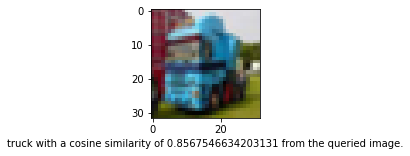

In [10]:
if encoding_method == '1':
    encoding_dir = '/Users/sidv88/Documents/Data_Management_2/Deep_Encoded_Data/'
elif encoding_method == '2':
    encoding_dir = '/Users/sidv88/Documents/Data_Management_2/Denoised_Encoded_Data/'
else:
    encoding_dir = '/Users/sidv88/Documents/Data_Management_2/Convolutional_Encoded_Data/'

#print(encoding_dir)

if combination == '1':
    encoding_file = 'RSAM.csv'
elif combination == '2':
    encoding_file = 'RTAM.csv'
elif combination == '3':
    encoding_file = 'RSADM.csv'
elif combination == '4':
    encoding_file = 'RTADM.csv'
elif combination == '5':
    encoding_file = 'RSAB.csv'
elif combination == '6':
    encoding_file = 'RTAB.csv'
elif combination == '7':
    encoding_file = 'RSADB.csv'
else:
    encoding_file = 'RTADB.csv'
    
#print(encoding_file)

encoded_df = pd.read_csv(encoding_dir + encoding_file)
#print(encoded_df.shape)

queried_item = encoded_df.loc[encoded_df['Class Name'] == input_item].iloc[int(input_num) - 1, 2:]
#print(queried_item)

if similarity_metric == '1':
    #print("Cosine")
    cosine_similarity = []
    cosine_distance = []
    for i in range(encoded_df.shape[0]):
        dataset_item = encoded_df.iloc[i, 2:]
        cos_sim = dot(queried_item, dataset_item)/(norm(queried_item) * norm(dataset_item))
        cos_dist = 1 - cos_sim
        cosine_similarity.append(cos_sim)
        cosine_distance.append(cos_dist)
    
    encoded_df['Cosine Similarity'] = cosine_similarity
    encoded_df['Cosine Distance'] = cosine_distance
    cosine_index = encoded_df.sort_values(by = ['Cosine Distance']).head(10).index
    x_test = np.array(df.iloc[:, 2:])
    for j in cosine_index:
        plt.figure(figsize = (2, 2))
        plt.imshow(x_test[j].reshape(32, 32, 3))
        plt.xlabel(df['Class Name'][j] + ' with a cosine similarity of ' + str(encoded_df['Cosine Similarity'][j]) + ' from the queried image.')
        plt.show()

else:
    #print("Euclidean")
    euclidean_distance = []
    for i in range(encoded_df.shape[0]):
        dataset_item = encoded_df.iloc[i, 2:]
        euc_dist = np.linalg.norm(queried_item - dataset_item)
        euclidean_distance.append(euc_dist)
    
    encoded_df['Euclidean Distance'] = euclidean_distance
    euclidean_index = encoded_df.sort_values(by = ['Euclidean Distance']).head(10).index
    x_test = np.array(df.iloc[:, 2:])
    for j in euclidean_index:
        plt.figure(figsize = (2, 2))
        plt.imshow(x_test[j].reshape(32, 32, 3))
        plt.xlabel(df['Class Name'][j] + ' with an Euclidean Distance of ' + str(encoded_df['Euclidean Distance'][j]) + ' from the queried image.')
        plt.show()